Histograms of rt_N and rt_O: These illustrate the distribution of response times under two conditions, possibly "neutral" and "other".

Boxplots:

*   rt_N varies across different blocks.
*   rt_O varies across different trial types.

Bar plots: The number of trials per trial_type and per response category.

<ipython-input-2-e7de916acf1e>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='trial_type', ax=axes[2, 0], palette='pastel')
<ipython-input-2-e7de916acf1e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='response', ax=axes[2, 1], palette='muted')


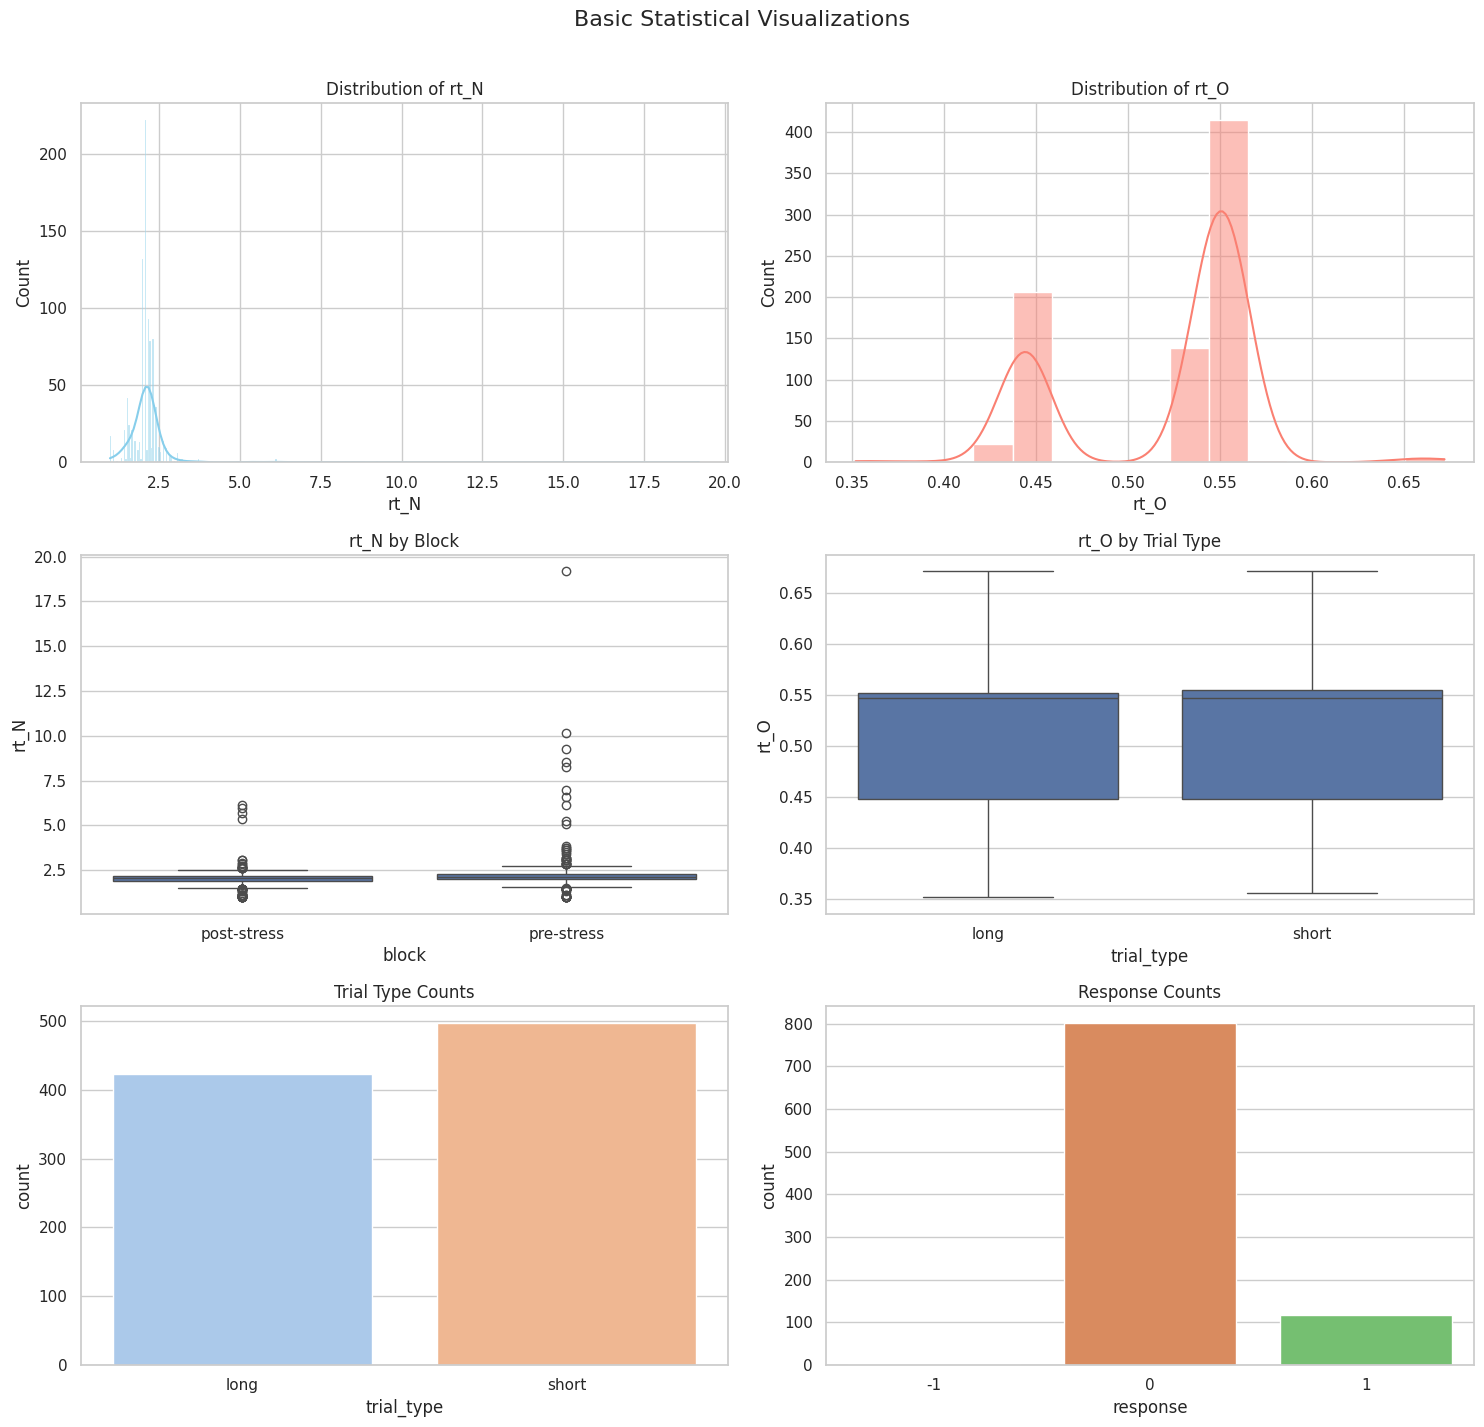

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data into a Pandas DataFrame
df = pd.read_csv('/content/epoched_trial_data_channelwise.csv')

# Set plot style
sns.set(style="whitegrid")

# Convert categorical variables to category dtype
categorical_cols = ['file', 'block', 'trial_type']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Plot settings
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Basic Statistical Visualizations', fontsize=16)

# Histogram of rt_N
sns.histplot(df['rt_N'].dropna(), kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of rt_N')

# Histogram of rt_O
sns.histplot(df['rt_O'].dropna(), kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of rt_O')

# Boxplot of rt_N by block
sns.boxplot(data=df, x='block', y='rt_N', ax=axes[1, 0])
axes[1, 0].set_title('rt_N by Block')

# Boxplot of rt_O by trial_type
sns.boxplot(data=df, x='trial_type', y='rt_O', ax=axes[1, 1])
axes[1, 1].set_title('rt_O by Trial Type')

# Bar plot of trial_type counts
sns.countplot(data=df, x='trial_type', ax=axes[2, 0], palette='pastel')
axes[2, 0].set_title('Trial Type Counts')

# Bar plot of response counts
sns.countplot(data=df, x='response', ax=axes[2, 1], palette='muted')
axes[2, 1].set_title('Response Counts')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()



Below: Average Power Spectral Density (PSD) across all trials for each EEG channel. Each line represents one channel’s frequency profile, averaged over time windows.

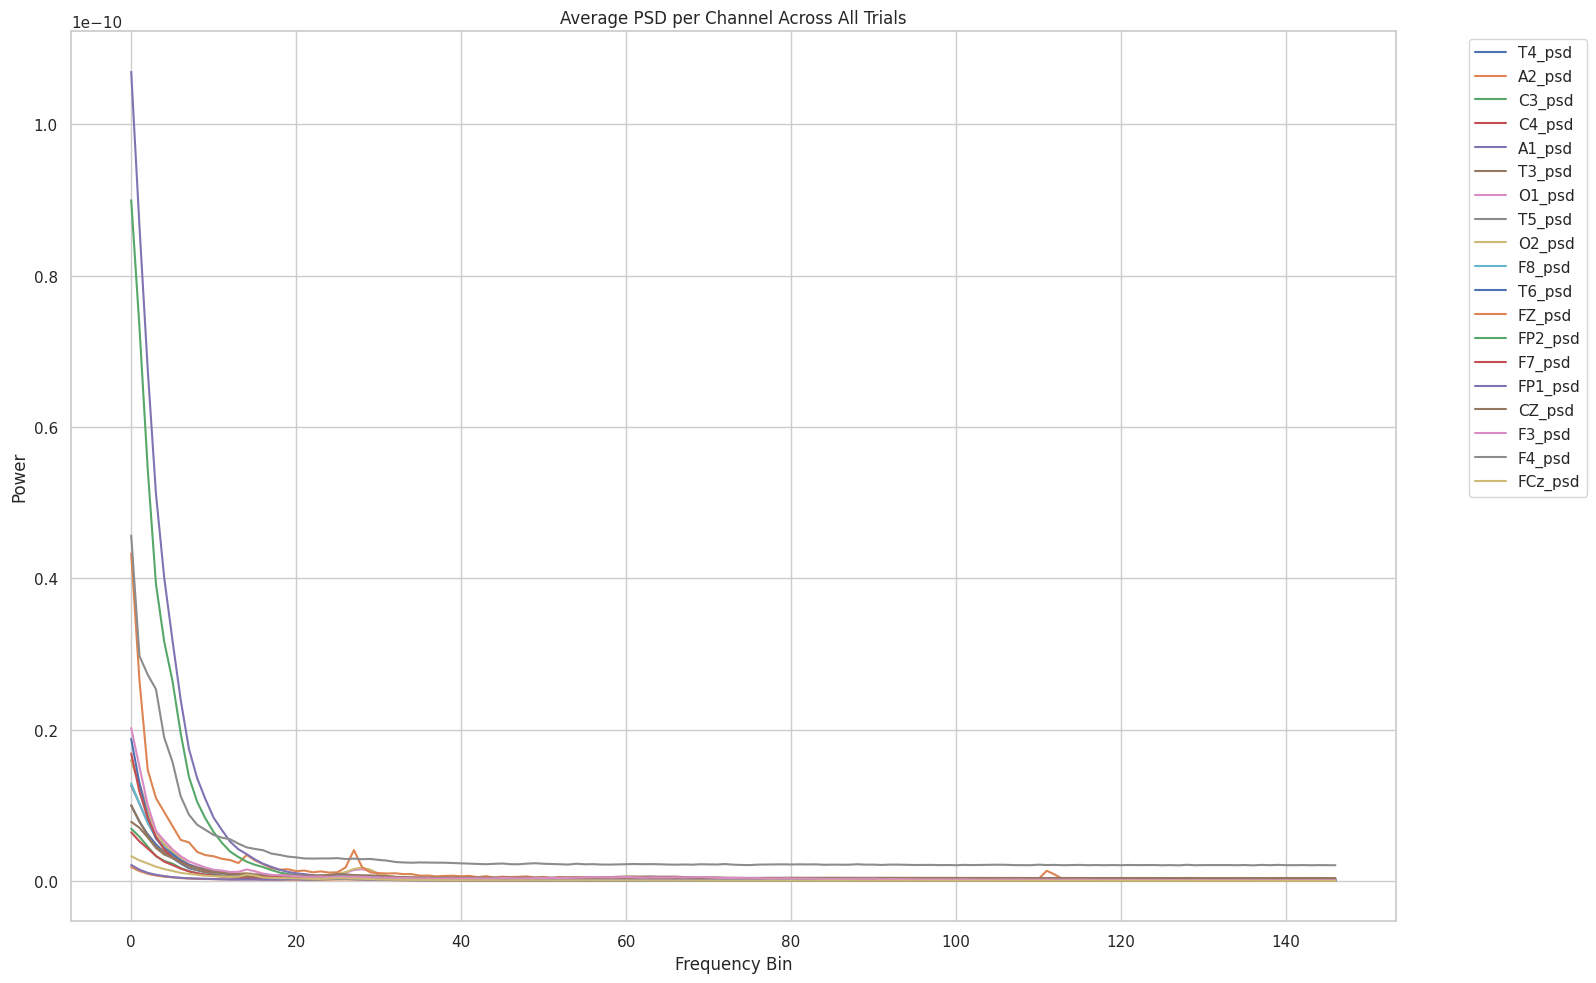

In [3]:
import ast
import numpy as np

# Extract PSD columns (those ending with '_psd')
psd_columns = [col for col in df.columns if col.endswith('_psd')]

# Convert string representations of lists to actual lists
for col in psd_columns:
    df[col] = df[col].dropna().apply(ast.literal_eval)

# Compute average PSD per channel (mean over all trials)
average_psd_per_channel = {
    col: np.mean(np.vstack(df[col].dropna().values), axis=0)
    for col in psd_columns
}

# Plot average PSD for each channel
plt.figure(figsize=(16, 10))
for i, (channel, psd_values) in enumerate(average_psd_per_channel.items()):
    plt.plot(psd_values, label=channel)

plt.title("Average PSD per Channel Across All Trials")
plt.xlabel("Frequency Bin")
plt.ylabel("Power")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=1)
plt.tight_layout()
plt.show()


PSDs by condition — Average PSD per channel grouped by trial_type

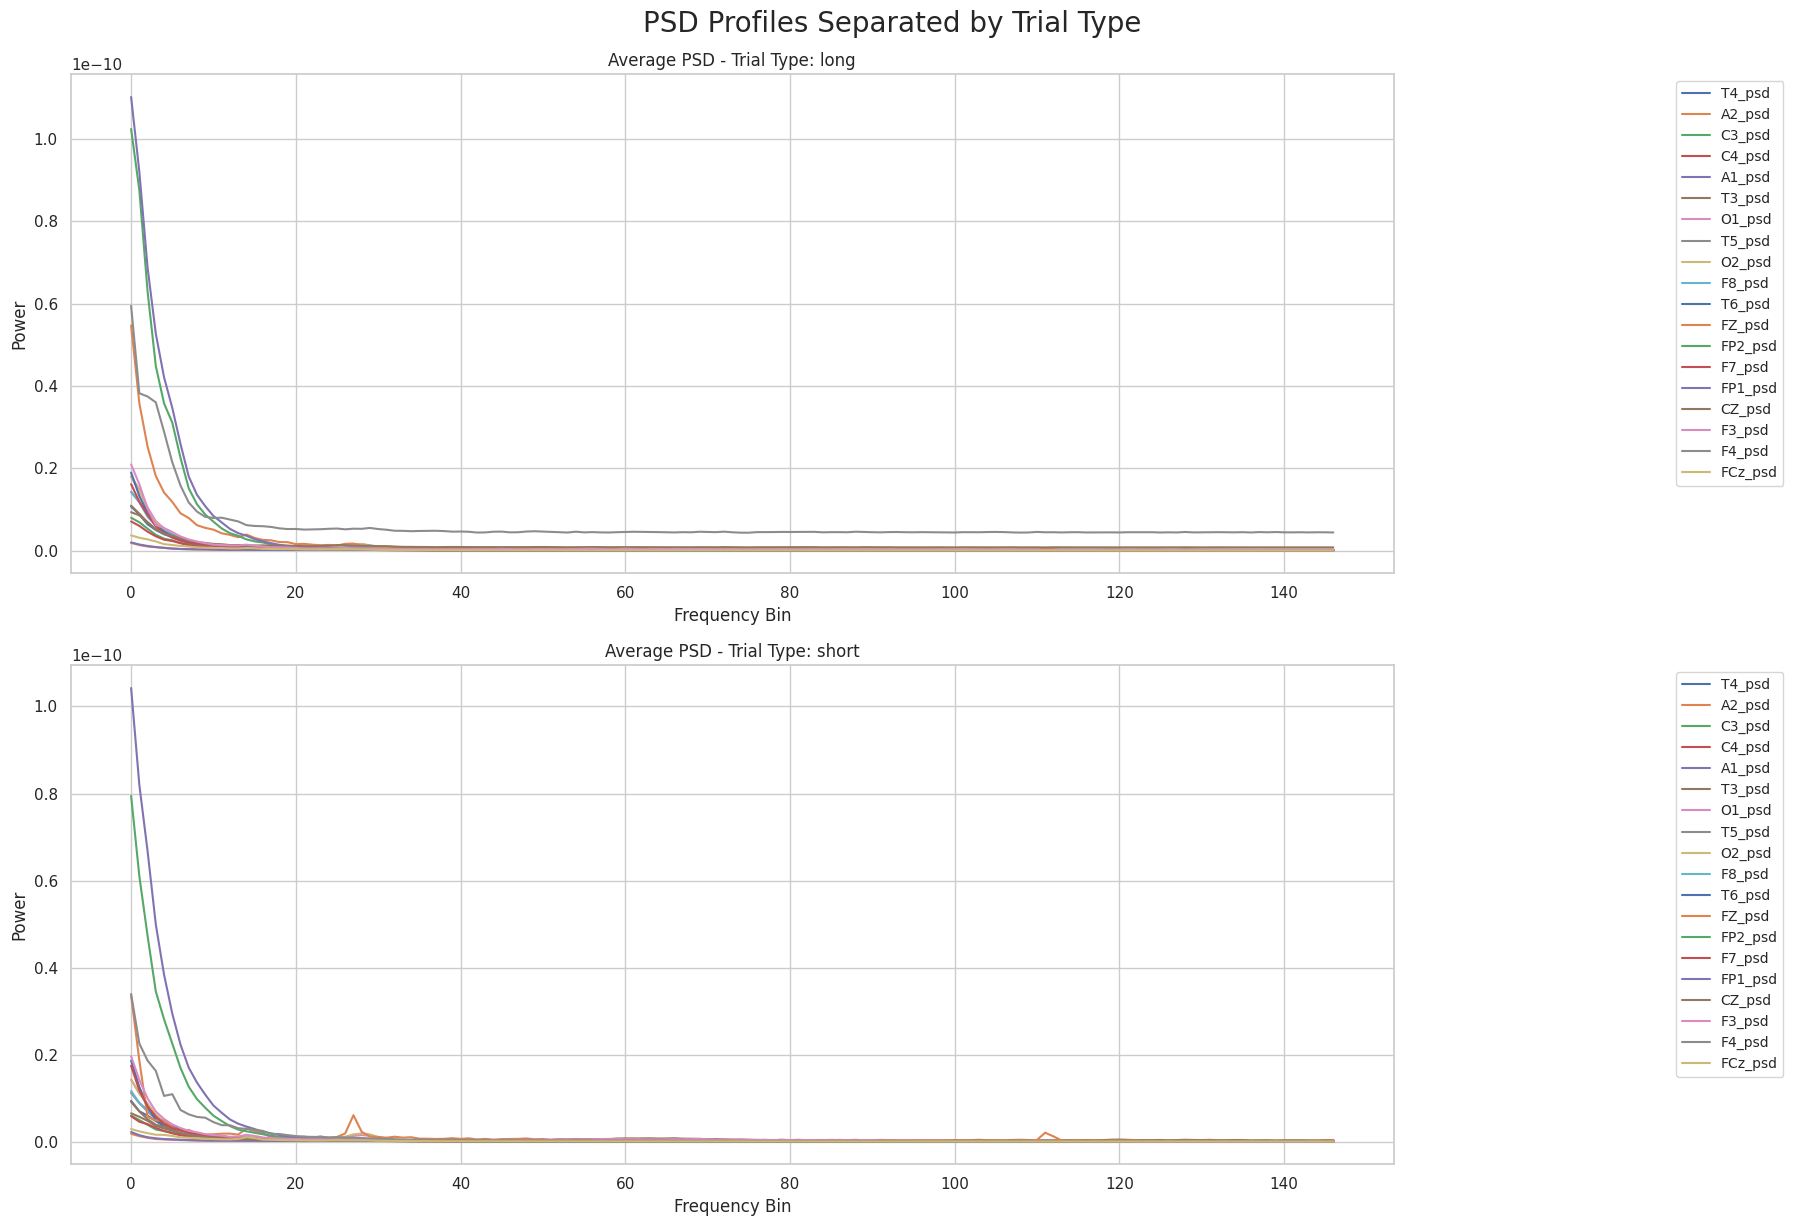

In [5]:
# Unique trial types
trial_types = df['trial_type'].dropna().unique()

# Prepare figure
plt.figure(figsize=(18, 12))

# Plot average PSD per channel, separated by trial type
for i, trial_type in enumerate(trial_types):
    plt.subplot(2, int(np.ceil(len(trial_types) / 2)), i + 1)

    # Filter data for the trial_type
    df_trial = df[df['trial_type'] == trial_type]

    # Compute average PSD per channel for this trial type
    average_psd_per_channel_trial = {
        col: np.mean(np.vstack(df_trial[col].dropna().values), axis=0)
        for col in psd_columns
    }

    # Plot each channel
    for channel, psd_values in average_psd_per_channel_trial.items():
        plt.plot(psd_values, label=channel)

    plt.title(f"Average PSD - Trial Type: {trial_type}")
    plt.xlabel("Frequency Bin")
    plt.ylabel("Power")
    plt.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.tight_layout()

plt.suptitle("PSD Profiles Separated by Trial Type", fontsize=20, y=1.02)
plt.show()


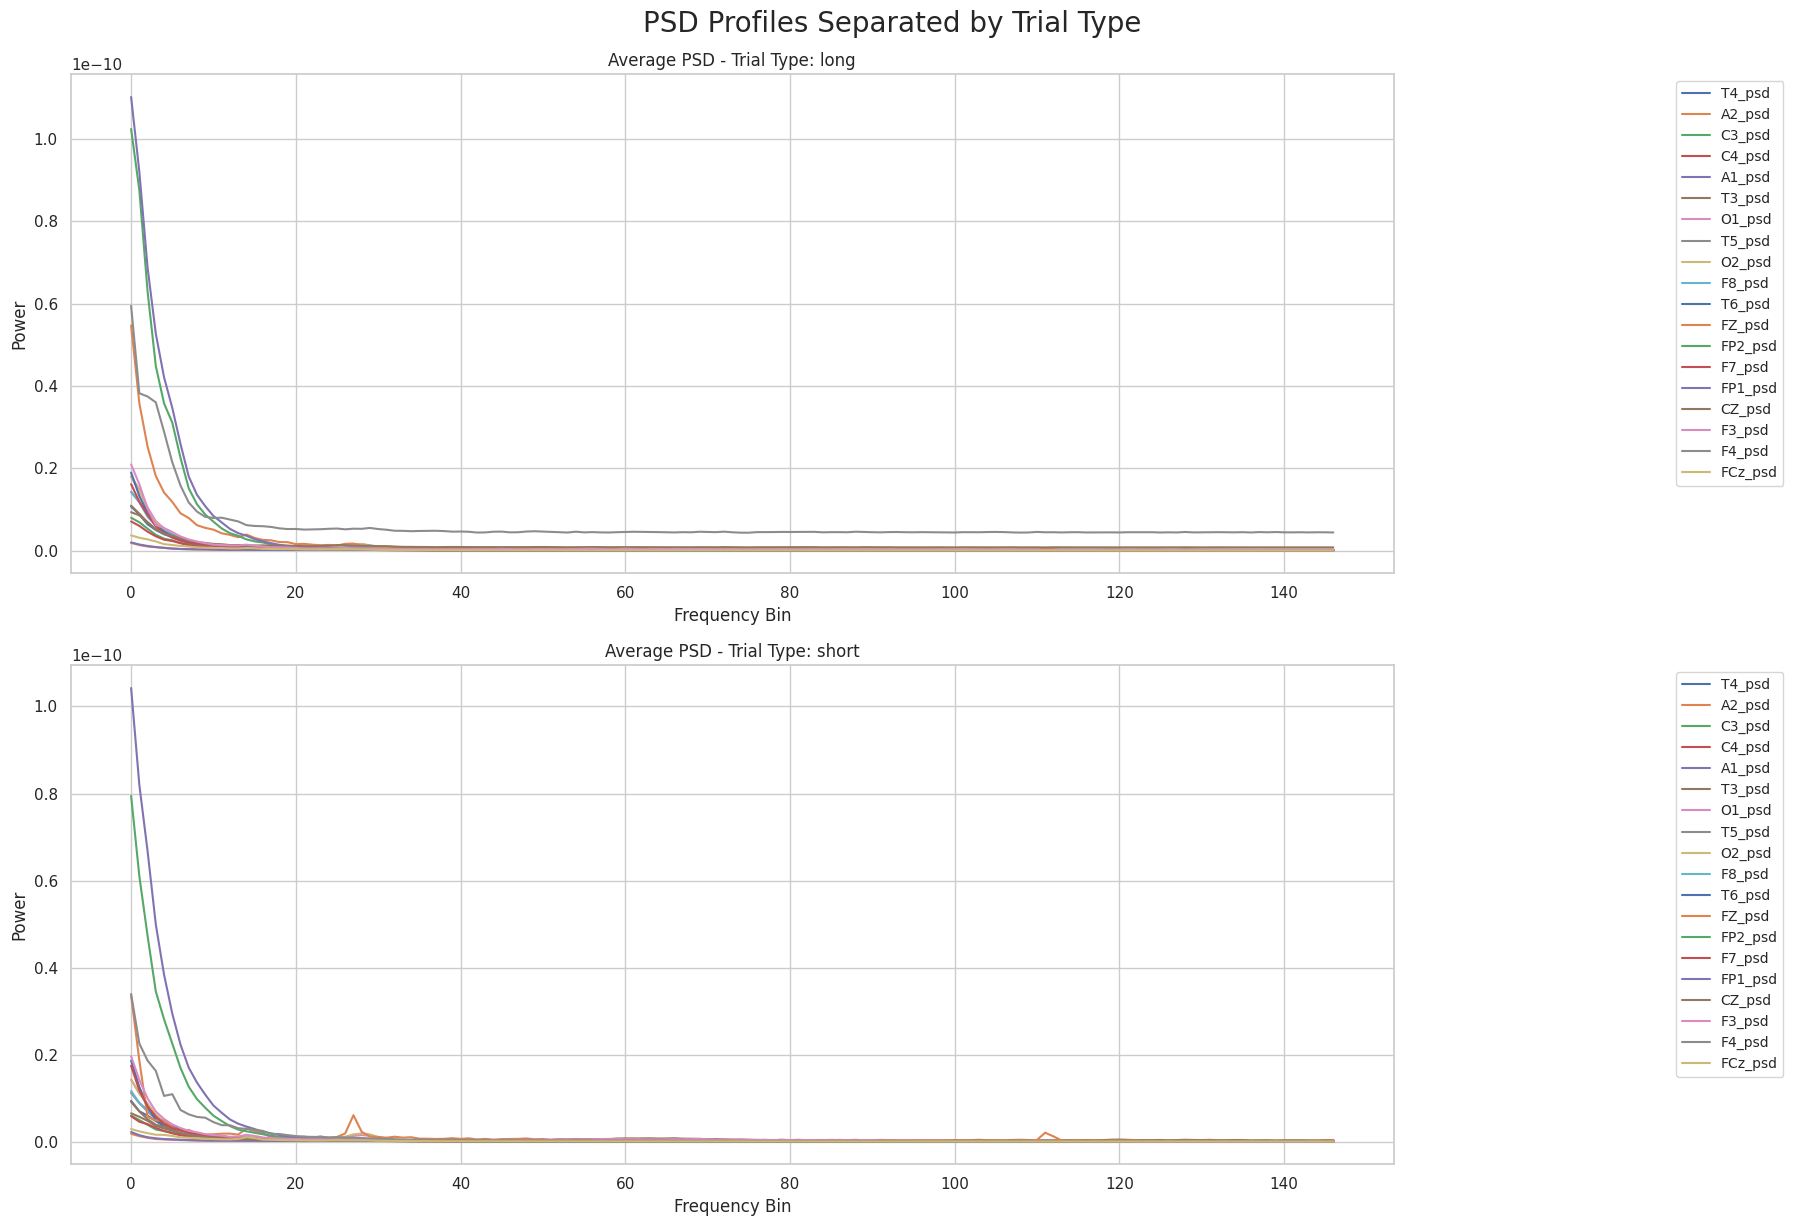

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import ast

# Safely parse PSD columns
def safe_parse(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return np.nan

for col in psd_columns:
    df[col] = df[col].apply(lambda x: safe_parse(x) if isinstance(x, str) else x)

# Unique trial types
trial_types = df['trial_type'].dropna().unique()

# Create figure
plt.figure(figsize=(18, 12))

for i, trial_type in enumerate(trial_types):
    plt.subplot(2, int(np.ceil(len(trial_types) / 2)), i + 1)

    # Filter data for the trial_type
    df_trial = df[df['trial_type'] == trial_type]

    # Only keep valid PSD entries
    df_trial_valid = df_trial[psd_columns].dropna()

    if not df_trial_valid.empty:
        # Compute average PSD per channel
        average_psd_per_channel_trial = {
            col: np.mean(np.vstack(df_trial_valid[col].values), axis=0)
            for col in psd_columns
        }

        # Plot each channel
        for channel, psd_values in average_psd_per_channel_trial.items():
            plt.plot(psd_values, label=channel)

    plt.title(f"Average PSD - Trial Type: {trial_type}")
    plt.xlabel("Frequency Bin")
    plt.ylabel("Power")
    plt.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.tight_layout()

plt.suptitle("PSD Profiles Separated by Trial Type", fontsize=20, y=1.02)
plt.show()


In [11]:
print(df['F8_psd'].apply(type).value_counts())
# check that all PSD columns have proper list-type data

F8_psd
<class 'list'>    920
Name: count, dtype: int64


Plotting average PSDs grouped by block

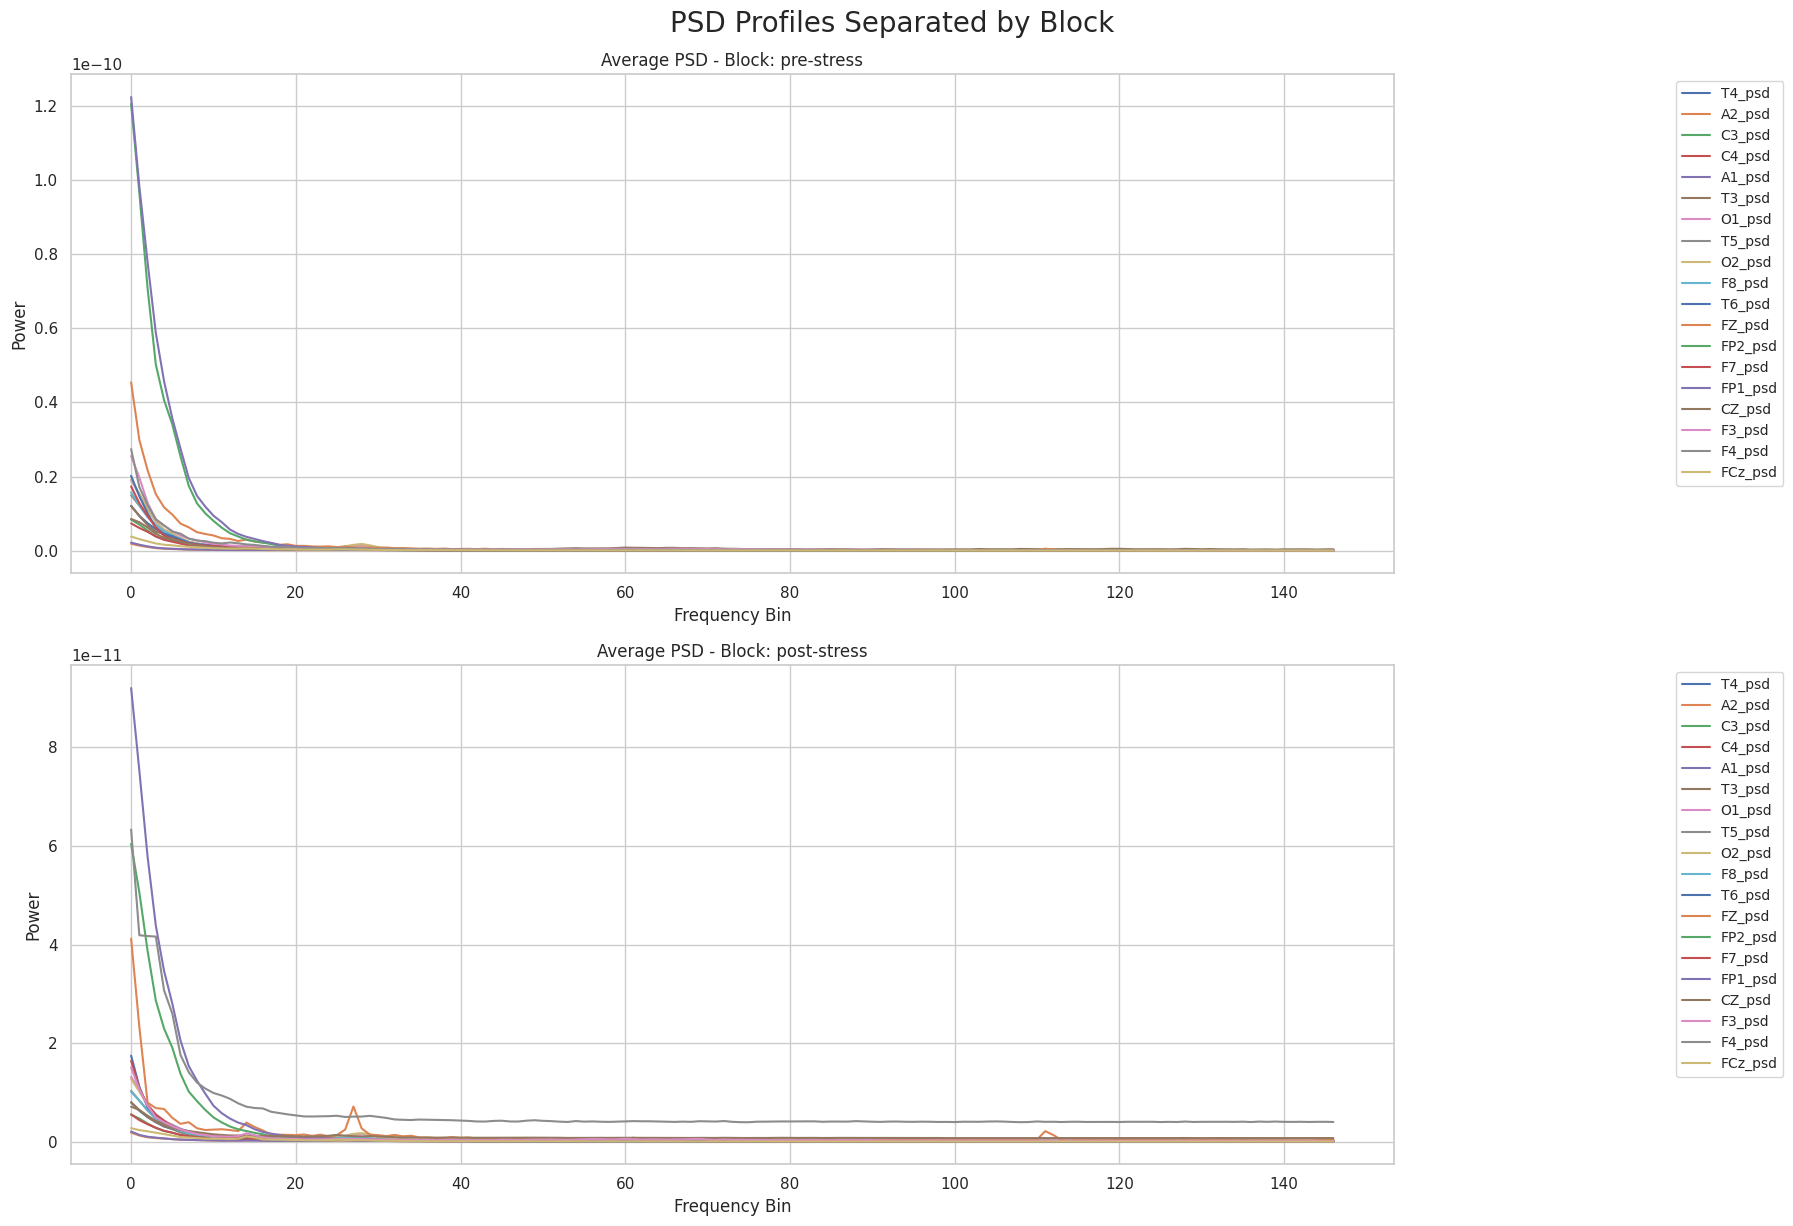

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import ast

# Function to safely parse PSD values
def safe_parse(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return np.nan
    return val  # Already a list

# Apply safe parsing to all PSD columns
for col in psd_columns:
    df[col] = df[col].apply(safe_parse)

# Get unique blocks
blocks = df['block'].dropna().unique()

# Create the figure
plt.figure(figsize=(18, 12))

for i, block in enumerate(blocks):
    plt.subplot(2, int(np.ceil(len(blocks) / 2)), i + 1)

    # Filter data for the current block
    df_block = df[df['block'] == block]

    # Drop rows with any NaN PSDs
    df_block_valid = df_block[psd_columns].dropna()

    if not df_block_valid.empty:
        # Compute average PSD per channel
        average_psd_per_channel_block = {
            col: np.mean(np.vstack(df_block_valid[col].values), axis=0)
            for col in psd_columns
        }

        # Plot PSDs for each channel
        for channel, psd_values in average_psd_per_channel_block.items():
            plt.plot(psd_values, label=channel)

    plt.title(f"Average PSD - Block: {block}")
    plt.xlabel("Frequency Bin")
    plt.ylabel("Power")
    plt.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.tight_layout()

plt.suptitle("PSD Profiles Separated by Block", fontsize=20, y=1.02)
plt.show()


PSD (Power Spectral Density) values across trial types

*   Per-frequency-bin (fine-grained)
*   Per-channel (collapsing across frequencies or at each band)
*   Band-averaged (e.g., alpha, beta bands)



